In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1', encoding_errors="ignore")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [19]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df=df.rename(columns={'v1':'target','v2':'text'})

In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.duplicated().value_counts()

,count
False,5169
True,403


In [12]:
df.isnull().sum()

,0
target,0
text,0


In [9]:
df=df.drop_duplicates()

In [ ]:
#EDA

In [16]:
df['target'].value_counts()

,count
target,
ham,4516
spam,653


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


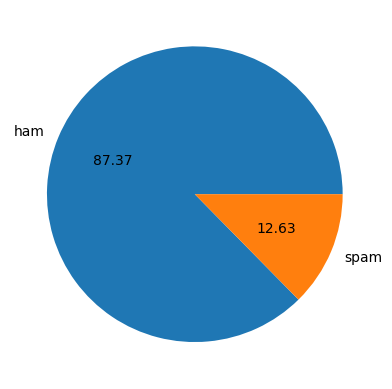

In [13]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [14]:
import nltk

In [15]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
df['num_characters'] = df['text'].apply(len)

In [17]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [124]:
#data preprocessing

Lower case,
Tokenization,
Removing special characters,
Removing stop words and punctuation,
Stemming


In [22]:
df['text']=df['text'].str.lower()

In [23]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"go until jurong point, crazy.. available only ...",111,24,2
1,0,ok lar... joking wif u oni...,29,8,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df['text']=df['text'].apply(lambda x:nltk.word_tokenize(x))

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"[go, until, jurong, point, ,, crazy, .., avail...",111,24,2
1,0,"[ok, lar, ..., joking, wif, u, oni, ...]",29,8,2
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f...",155,37,2
3,0,"[u, dun, say, so, early, hor, ..., u, c, alrea...",49,13,1
4,0,"[nah, i, do, n't, think, he, goes, to, usf, ,,...",61,15,1


In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [26]:
import string
from nltk.corpus import stopwords


In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
def transform_text(text):
  y = []
  for i in text:
        if i.isalnum():
            y.append(i)

  text = y[:]
  y.clear()

  for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

  text = y[:]
  y.clear()

  for i in text:
        y.append(ps.stem(i))

  return " ".join(y)

In [29]:
df['transformed_text'] = df['text'].apply(transform_text)

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"[go, until, jurong, point, ,, crazy, .., avail...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,"[ok, lar, ..., joking, wif, u, oni, ...]",29,8,2,ok lar joke wif u oni
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f...",155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,"[u, dun, say, so, early, hor, ..., u, c, alrea...",49,13,1,u dun say earli hor u c alreadi say
4,0,"[nah, i, do, n't, think, he, goes, to, usf, ,,...",61,15,1,nah think goe usf live around though


In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [32]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

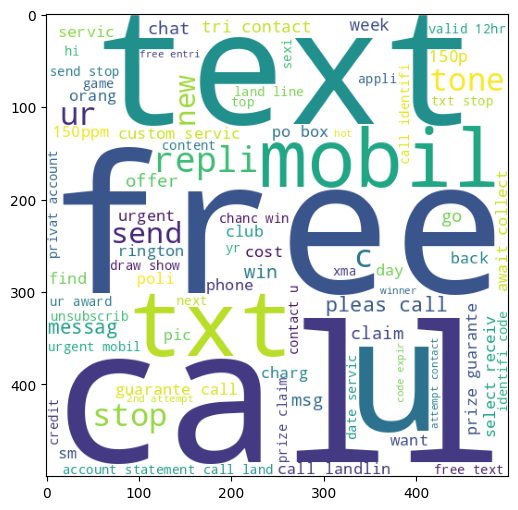

In [33]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [55]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

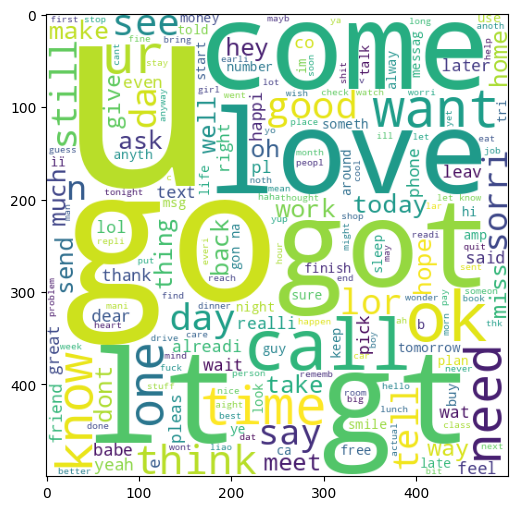

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

Model Building

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [35]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [37]:
y = df['target'].values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [41]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [42]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [69]:

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [43]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred2)
print(recall)

0.782608695652174


In [44]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X_train, y_train)


In [45]:
mnb.fit(X_res,y_res)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [46]:
recall = recall_score(y_test, y_pred2)
print(recall)

0.9130434782608695


In [47]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resu, y_resu = rus.fit_resample(X_train, y_train)


In [48]:
mnb.fit(X_resu,y_resu)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
recall = recall_score(y_test, y_pred2)
print(recall)

0.9400386847195358
[[839  57]
 [  5 133]]
0.7
0.9637681159420289


In [ ]:
'''Model	     Accuracy Precision	Recall
Undersampling	0.94   	0.70	0.96	Recall best, precision worst
Oversampling	0.965	  0.84	 0.91	 Best balance
No balancing	0.97   	1.0	   0.78 	Misses most spam''

In [49]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
# tfidf --> MNB